# <center> Current Research in Data Science
# <center> Interpretable Machine Learning: Bank Campaign 
## <center> Hypothesis 1 & 5 

**Task 1**:

 What are the most important features and how much do they contribute to the success rate?

**Task 5**:

How can the bank managers strategise campaign features to get maximum success?


**To Do**:

1. Adapt Shapley value, SHAP feat imp, SHAP summary plot
2. Adapt SHAP individual prediction, Clustering SHAP values, Global Surrogate
3. Adapt SHAP dependency plot, SHAP interaction value

**Load Data and Model**

In [1]:
!conda env list

# conda environments:
#
base                  *  /home/ubuntu/anaconda3
pbds20                   /home/ubuntu/anaconda3/envs/pbds20



In [2]:
%load_ext autoreload

import sys
sys.path.insert(0, "../src")

import os
os.chdir("../src")

import csv
import joblib
import pandas as pd
from utils import load_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [3]:
x_train, x_test, y_train, y_test  = load_data()
x_train_hpo, x_val_hpo, y_train_hpo, y_val_hpo = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)

../src/utils.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_features] = scaler.transform(x_train[num_features])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
../src/utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [22]:
with open('../results/IML/LGBM/model.pkl', 'rb') as file:
    lgbm = joblib.load(file)

In [21]:
with open('../results/retrain_best_svm_with_prob/SVR/model.pkl', 'rb') as file:
    svr = joblib.load(file)

In [23]:
svr.predict_proba

<bound method BaseSVC._predict_proba of SVC(C=2, degree=6, max_iter=4623, probability=True)>

### ***Interpretable Machine Learning Libraries***

#### For our first issue, we will try to answer a few questions regarding the predictive process of our model as given below with the corresponding methodology mentioned.

##### • What are the individual contributions made by a feature of interest when making a successful/unsuccessful deposit to occur?
- [Shapley value, SHAP feat. imp, SHAP summary plot]
1. What is the effect of client information on prediction?
2. How influential are socio-economic indicators on an average client’s ability to make a successful
deposit?
3. How does month or day of week influence success rate?

##### • Which features are the most important for making a successful/unsuccessful deposit to occur?
- [SHAP individual prediction, Clustering SHAP values, Global Surrogate]
1. Which client information are important for making a deposit?
2. Which campaign strategies are most influential for success?
3. Does year end or fiscal year end have an impact on success rate?
4. Are social status and stability relevant?

In [11]:
# !pip install shap
import sklearn
import shap
# print the JS visualization code to the notebook
shap.initjs()

# LGBM

In [12]:
explainer = shap.TreeExplainer(lgbm)

In [44]:
shap_values = explainer.shap_values(x_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [19]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], x_test.iloc[0,:])

In [27]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], x_test.iloc[:1000,:])

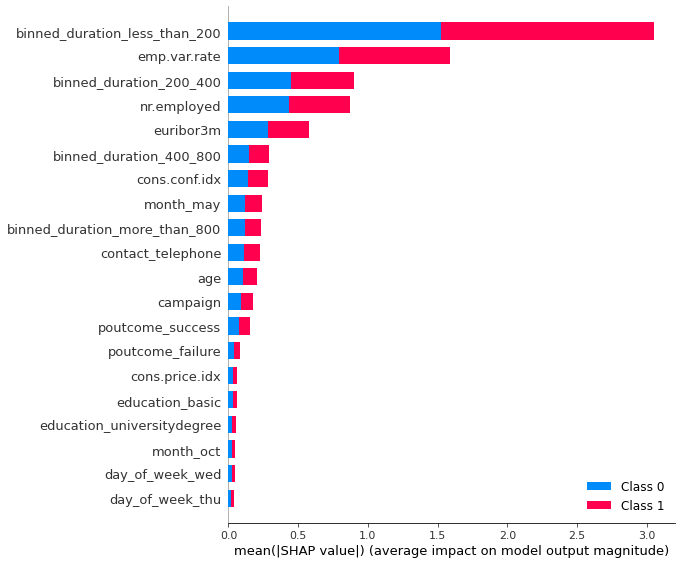

In [29]:
shap.summary_plot(shap_values, x_test)

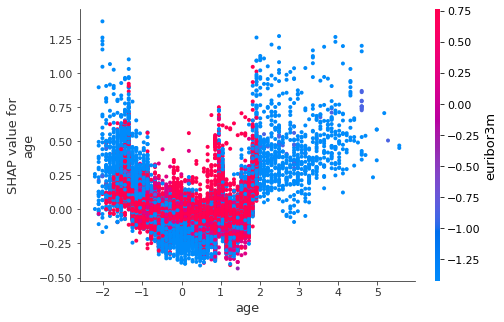

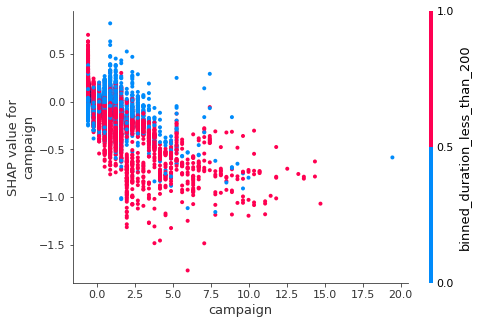

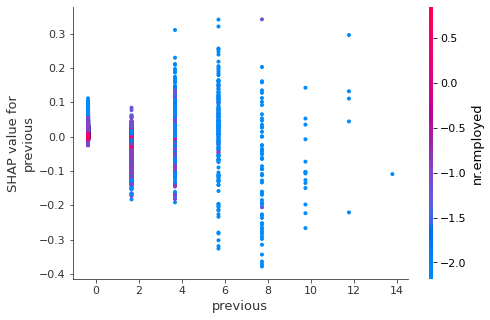

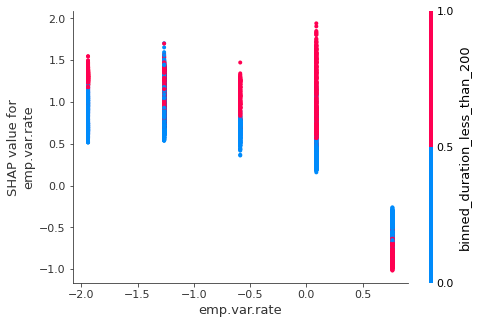

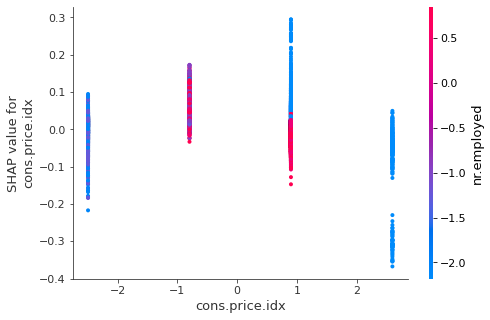

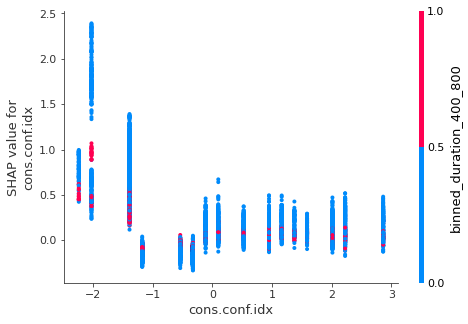

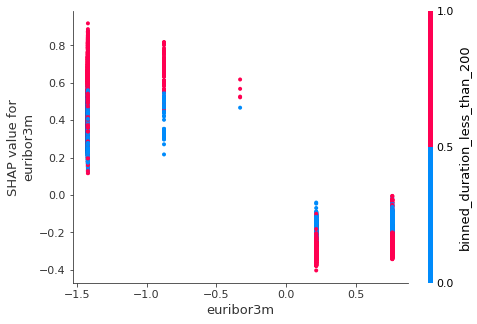

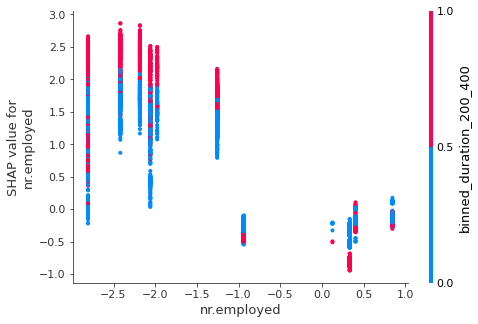

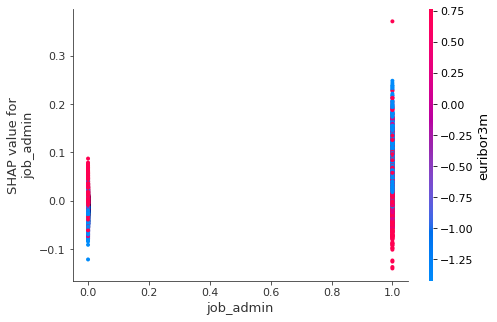

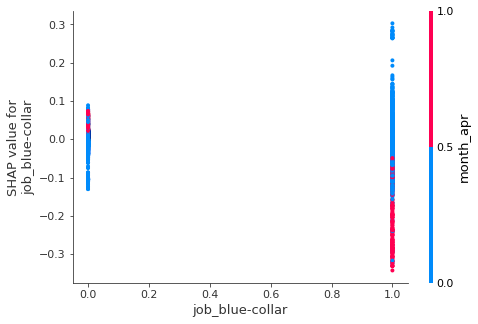

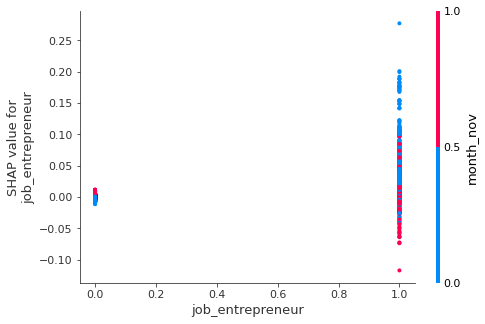

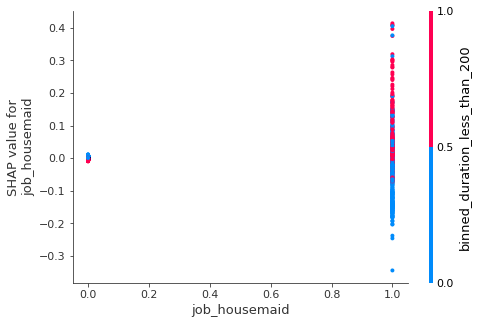

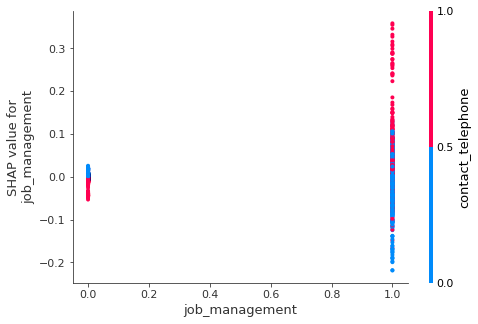

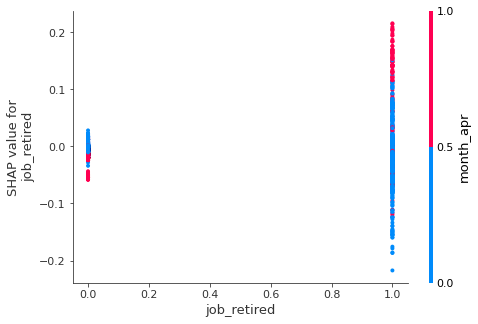

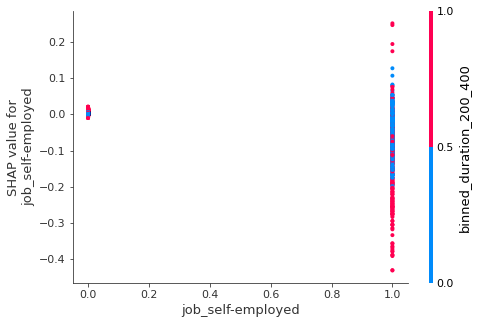

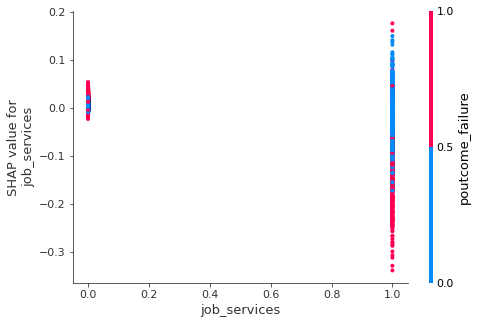

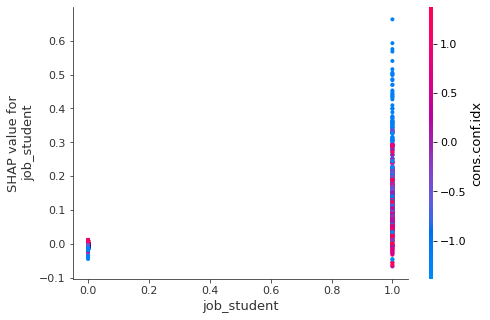

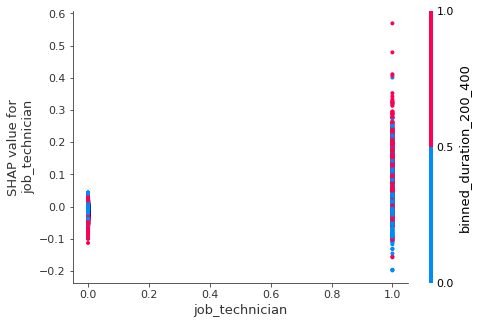

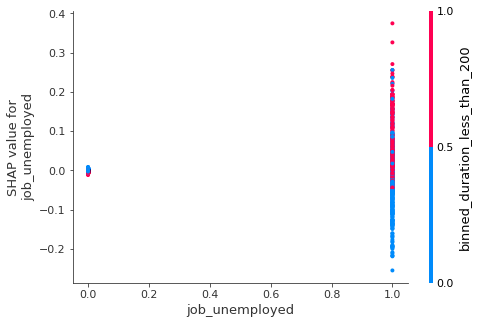

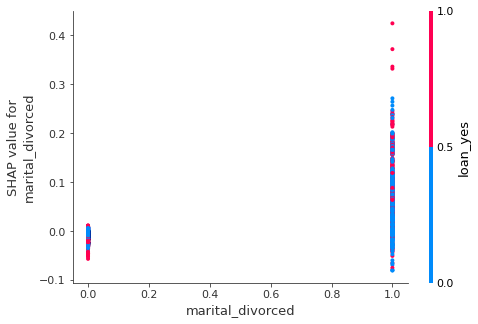

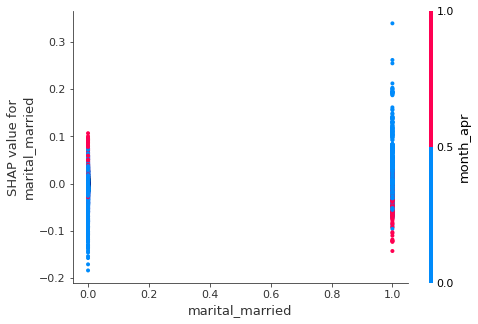

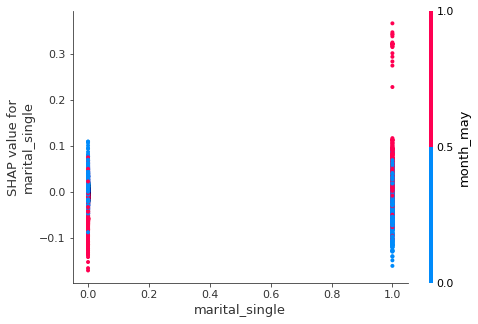

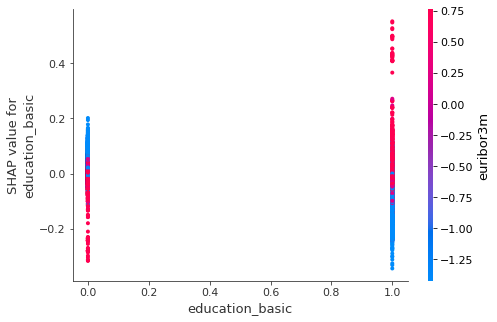

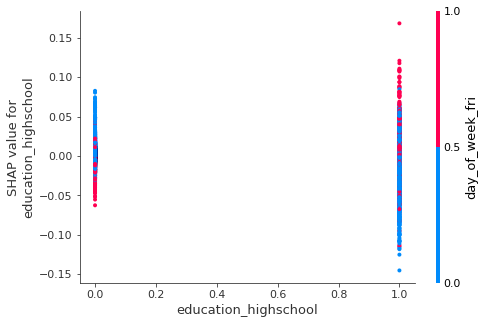

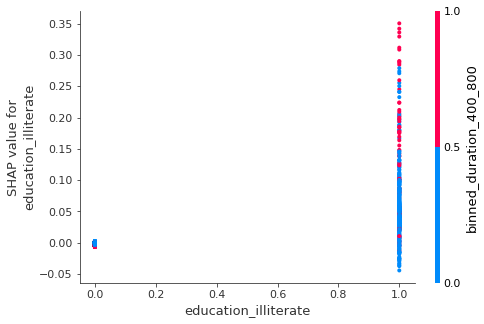

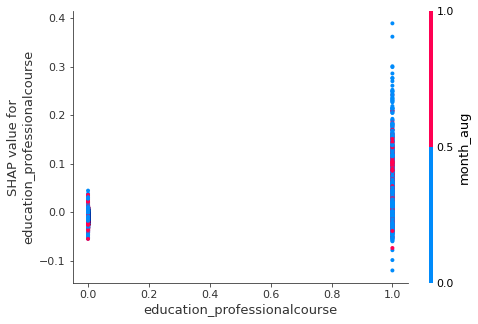

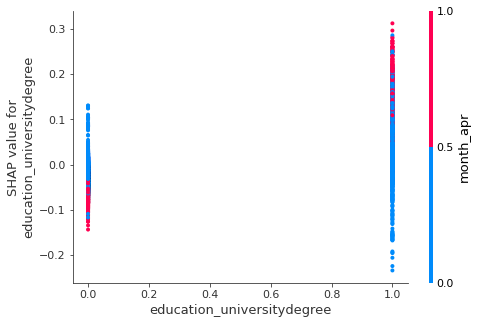

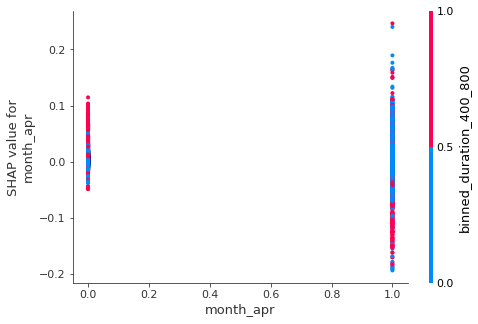

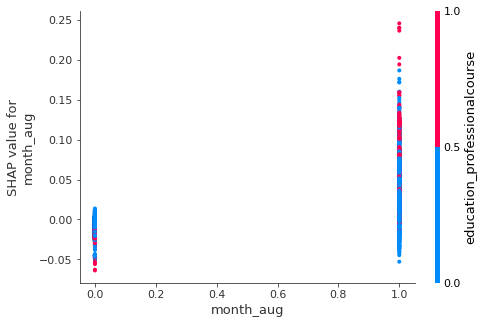

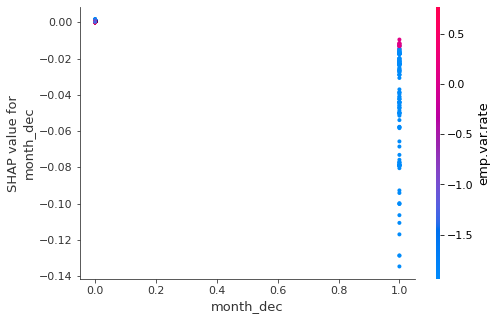

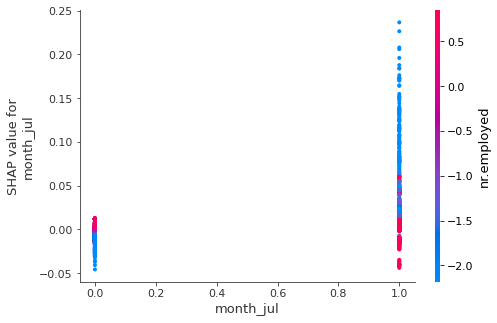

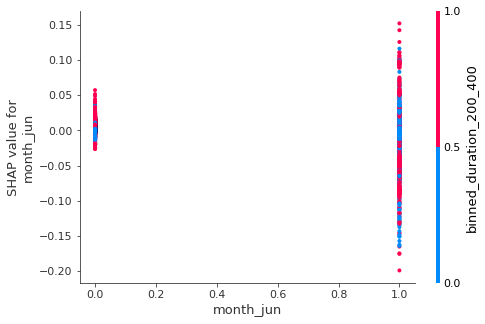

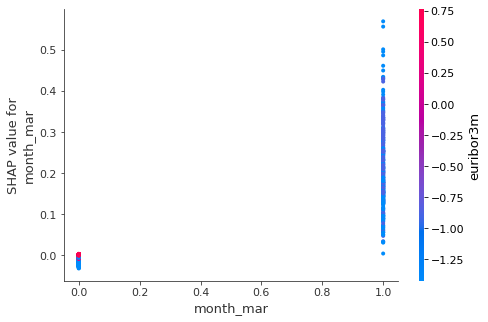

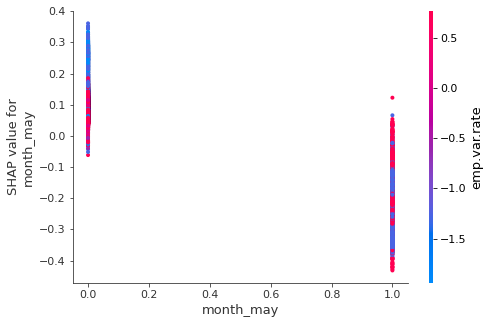

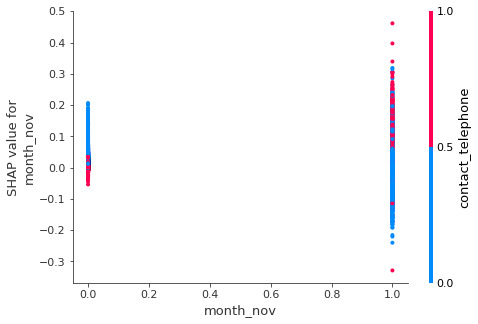

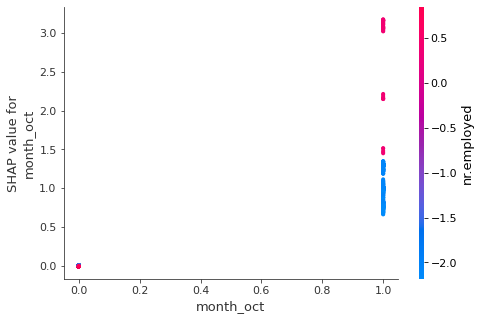

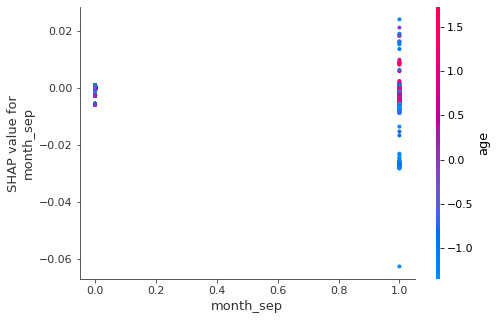

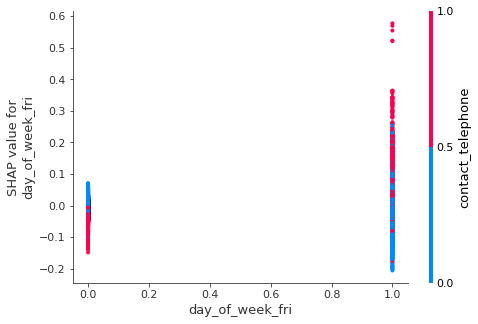

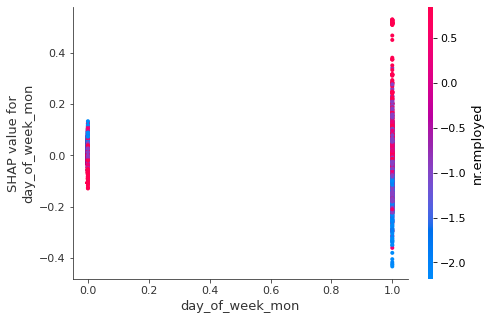

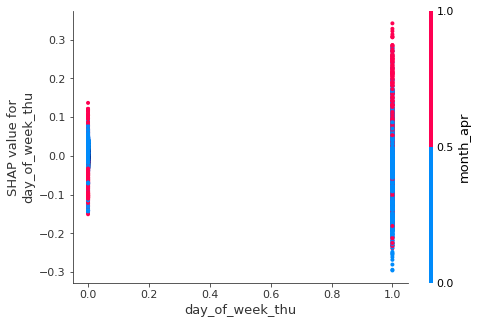

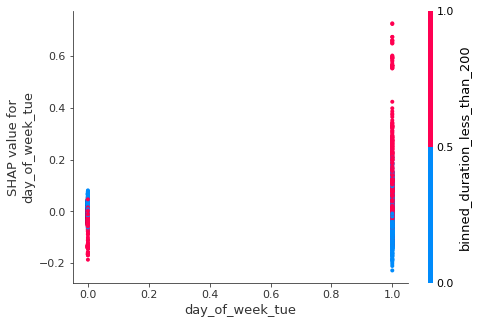

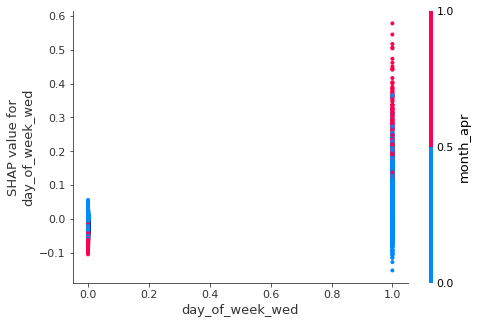

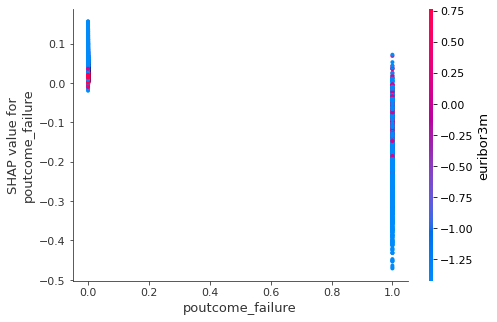

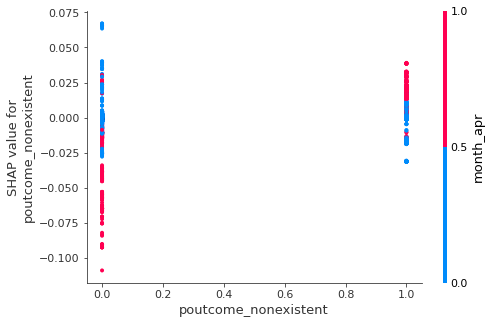

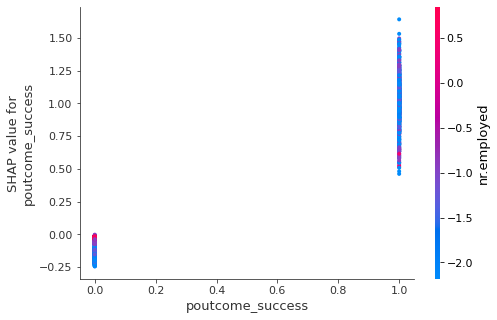

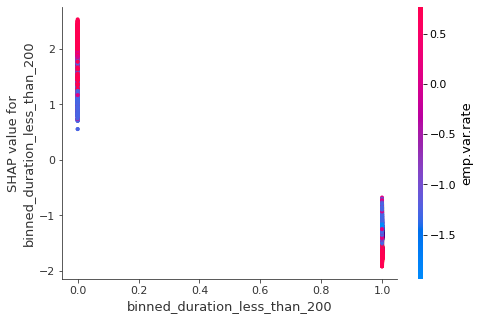

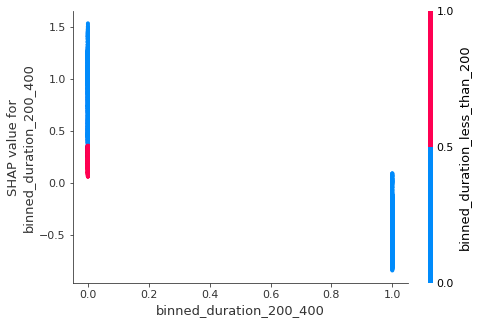

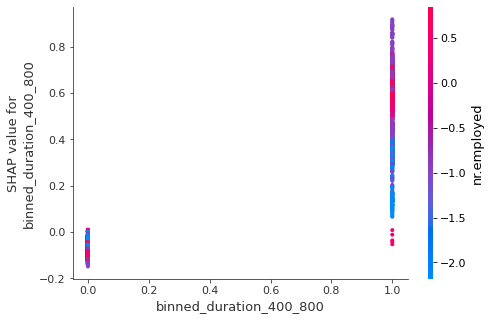

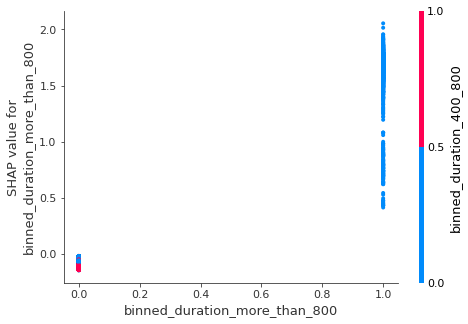

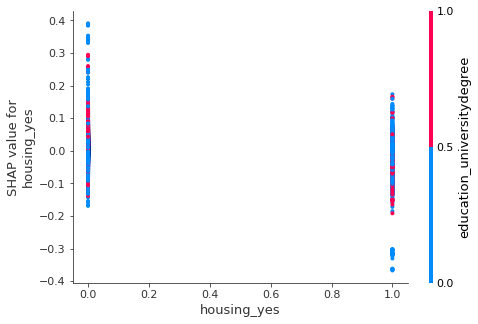

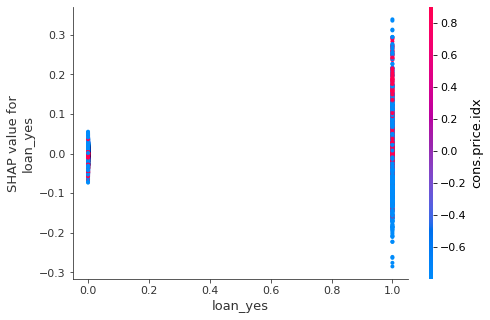

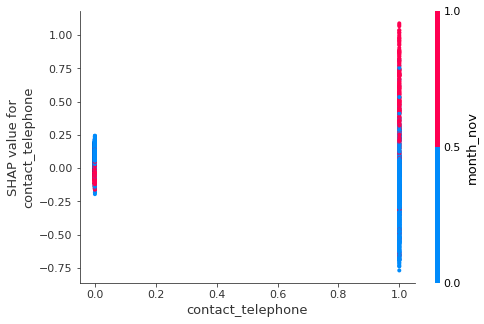

In [43]:
for name in x_train.columns:
    shap.dependence_plot(name, shap_values[1], x_train, display_features=x_train)

In [ ]:
#SVR
# use Kernel SHAP to explain test set predictions
# explainer2 = shap.KernelExplainer(svr.predict_proba, x_train, link="logit")
# shap_values = explainer2.shap_values(x_test, nsamples=2)
# plot the SHAP values for the Setosa output of the first instance
# shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], x_test.iloc[0,:], link="logit")